In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics

In [190]:
cust_data = pd.read_csv('C:\\Users\\Siva\\Desktop\\ExcelR\\Project3\\new\\cust_data.csv')

In [191]:
cust_data

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,CustomerAge,Sr_Customer,Children,TotalAcceptedCmp,MntTotalProducts,NumTotalPurchases,Income_Grp,CustomerAgeGrp
0,0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,66,11,0,0,1269,21,High,SrCitizen
1,1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,69,9,2,0,18,4,Low,SrCitizen
2,2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,58,10,0,0,602,11,High,MiddleAge
3,3,6182,1984,Graduation,Married,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,39,9,1,0,35,4,Low,Adult
4,4,5324,1981,PostGraduation,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,42,9,1,0,334,13,High,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190,2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,56,10,1,0,934,14,High,MiddleAge
2191,2236,4001,1946,PostGraduation,Married,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,77,9,3,1,436,17,High,SrCitizen
2192,2237,7270,1981,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,42,9,0,0,1173,6,High,Adult
2193,2238,8235,1956,PostGraduation,Married,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,67,9,1,0,672,13,High,SrCitizen


In [192]:
cust_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [193]:
cust_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,CustomerAge,Sr_Customer,Children,TotalAcceptedCmp,MntTotalProducts,NumTotalPurchases,Income_Grp,CustomerAgeGrp
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,66,11,0,0,1269,21,High,SrCitizen
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,69,9,2,0,18,4,Low,SrCitizen
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,58,10,0,0,602,11,High,MiddleAge
3,6182,1984,Graduation,Married,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,39,9,1,0,35,4,Low,Adult
4,5324,1981,PostGraduation,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,42,9,1,0,334,13,High,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,56,10,1,0,934,14,High,MiddleAge
2191,4001,1946,PostGraduation,Married,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,77,9,3,1,436,17,High,SrCitizen
2192,7270,1981,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,42,9,0,0,1173,6,High,Adult
2193,8235,1956,PostGraduation,Married,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,67,9,1,0,672,13,High,SrCitizen


In [194]:
cust_data.drop(['ID','Year_Birth','Dt_Customer','Recency','Complain','Kidhome','Teenhome','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp2','AcceptedCmp1','Response'], axis=1,inplace=True)

In [195]:
#cust_data.drop(['Income_Grp','CustomerAgeGrp','Complain','Sr_Customer'],  axis=1,inplace=True)

In [196]:
data_clean = cust_data.copy()

In [197]:
data_clean

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,CustomerAge,Sr_Customer,Children,TotalAcceptedCmp,MntTotalProducts,NumTotalPurchases,Income_Grp,CustomerAgeGrp
0,Graduation,Single,58138.0,635,88,546,172,88,88,3,8,10,4,7,66,11,0,0,1269,21,High,SrCitizen
1,Graduation,Single,46344.0,11,1,6,2,1,6,2,1,1,2,5,69,9,2,0,18,4,Low,SrCitizen
2,Graduation,Married,71613.0,426,49,127,111,21,42,1,8,2,10,4,58,10,0,0,602,11,High,MiddleAge
3,Graduation,Married,26646.0,11,4,20,10,3,5,2,2,0,4,6,39,9,1,0,35,4,Low,Adult
4,PostGraduation,Married,58293.0,173,43,118,46,27,15,5,5,3,6,5,42,9,1,0,334,13,High,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190,Graduation,Married,61223.0,709,43,182,42,118,247,2,9,3,4,5,56,10,1,0,934,14,High,MiddleAge
2191,PostGraduation,Married,64014.0,406,0,30,0,0,8,7,8,2,5,7,77,9,3,1,436,17,High,SrCitizen
2192,Graduation,Single,56981.0,908,48,217,32,12,24,1,2,3,13,6,42,9,0,0,1173,6,High,Adult
2193,PostGraduation,Married,69245.0,428,30,214,80,30,61,2,6,5,10,3,67,9,1,0,672,13,High,SrCitizen


In [198]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

# Data Preprocessing

Converting categorical to numerical features

In [689]:
#LE=LabelEncoder()

In [690]:
#data_clean['Education']=LE.fit_transform(data_clean['Education'])

In [691]:
#data_clean['Education'].value_counts()

In [692]:
#data_clean['Marital_Status']=LE.fit_transform(data_clean['Marital_Status'])

In [693]:
#data_clean['Marital_Status'].value_counts()

In [694]:
#data_clean['Income_Grp']=LE.fit_transform(data_clean['Income_Grp'])

In [695]:
#data_clean['Income_Grp'].value_counts()

In [434]:
#data_clean['CustomerAgeGrp']=LE.fit_transform(data_clean['CustomerAgeGrp'])

In [435]:
#data_clean['CustomerAgeGrp'].value_counts()

In [436]:
#ohe=OneHotEncoder()

In [437]:
#enc_df = pd.DataFrame(ohe.fit_transform(data_clean[['Education']]).toarray())
#enc_df

In [438]:
#enc_df.rename(columns = {0:'Edu_0', 1:'Edu_1', 2:'Edu_2'}, inplace = True)

In [439]:
#data_clean = data_clean.join(enc_df)
#data_clean

In [440]:
#enc_df = pd.DataFrame(ohe.fit_transform(data_clean[['Marital_Status']]).toarray())
#enc_df

In [441]:
#enc_df.rename(columns = {0:'MaritalStatus_0', 1:'MaritalStatus_1'}, inplace = True)

In [442]:
#data_clean = data_clean.join(enc_df)
#data_clean

In [199]:
data_clean=pd.get_dummies(data_clean)

In [200]:
data_clean

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,CustomerAge,Sr_Customer,Children,TotalAcceptedCmp,MntTotalProducts,NumTotalPurchases,Education_Graduation,Education_PostGraduation,Education_UnderGraduation,Marital_Status_Married,Marital_Status_Single,Income_Grp_High,Income_Grp_Low,CustomerAgeGrp_Adult,CustomerAgeGrp_MiddleAge,CustomerAgeGrp_SrCitizen
0,58138.0,635,88,546,172,88,88,3,8,10,4,7,66,11,0,0,1269,21,1,0,0,0,1,1,0,0,0,1
1,46344.0,11,1,6,2,1,6,2,1,1,2,5,69,9,2,0,18,4,1,0,0,0,1,0,1,0,0,1
2,71613.0,426,49,127,111,21,42,1,8,2,10,4,58,10,0,0,602,11,1,0,0,1,0,1,0,0,1,0
3,26646.0,11,4,20,10,3,5,2,2,0,4,6,39,9,1,0,35,4,1,0,0,1,0,0,1,1,0,0
4,58293.0,173,43,118,46,27,15,5,5,3,6,5,42,9,1,0,334,13,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190,61223.0,709,43,182,42,118,247,2,9,3,4,5,56,10,1,0,934,14,1,0,0,1,0,1,0,0,1,0
2191,64014.0,406,0,30,0,0,8,7,8,2,5,7,77,9,3,1,436,17,0,1,0,1,0,1,0,0,0,1
2192,56981.0,908,48,217,32,12,24,1,2,3,13,6,42,9,0,0,1173,6,1,0,0,0,1,1,0,1,0,0
2193,69245.0,428,30,214,80,30,61,2,6,5,10,3,67,9,1,0,672,13,0,1,0,1,0,1,0,0,0,1


In [201]:
data_clean.columns

Index(['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'CustomerAge', 'Sr_Customer', 'Children',
       'TotalAcceptedCmp', 'MntTotalProducts', 'NumTotalPurchases',
       'Education_Graduation', 'Education_PostGraduation',
       'Education_UnderGraduation', 'Marital_Status_Married',
       'Marital_Status_Single', 'Income_Grp_High', 'Income_Grp_Low',
       'CustomerAgeGrp_Adult', 'CustomerAgeGrp_MiddleAge',
       'CustomerAgeGrp_SrCitizen'],
      dtype='object')

In [248]:
data_final=data_clean[['Income',
    'NumWebVisitsMonth', 'CustomerAge', #'TotalAcceptedCmp', 'Sr_Customer',
    'Children','MntTotalProducts', 'NumTotalPurchases',
       'Education_Graduation',  'Education_PostGraduation',
       'Education_UnderGraduation', 'Marital_Status_Married',
       #'Marital_Status_Single', 'Income_Grp_High', 'Income_Grp_Low',
       #'CustomerAgeGrp_Adult', 'CustomerAgeGrp_MiddleAge', 'CustomerAgeGrp_SrCitizen'
                      ]]
data_final

,Income,NumWebVisitsMonth,CustomerAge,Children,MntTotalProducts,NumTotalPurchases,Education_Graduation,Education_PostGraduation,Education_UnderGraduation,Marital_Status_Married
0,58138.0,7,66,0,1269,21,1,0,0,0
1,46344.0,5,69,2,18,4,1,0,0,0
2,71613.0,4,58,0,602,11,1,0,0,1
3,26646.0,6,39,1,35,4,1,0,0,1
4,58293.0,5,42,1,334,13,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
2190,61223.0,5,56,1,934,14,1,0,0,1
2191,64014.0,7,77,3,436,17,0,1,0,1
2192,56981.0,6,42,0,1173,6,1,0,0,0
2193,69245.0,3,67,1,672,13,0,1,0,1


Applying Standard Scalar

In [249]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data_final))
data 

,0,1,2,3,4,5,6,7,8,9
0,0.311027,0.730128,1.018978,-1.266451,1.482331,2.340029,0.989576,-0.783563,-0.359326,-1.348227
1,-0.263794,-0.134990,1.275466,1.405206,-0.925357,-0.979423,0.989576,-0.783563,-0.359326,-1.348227
2,0.967777,-0.567549,0.335011,-1.266451,0.198616,0.387410,0.989576,-0.783563,-0.359326,0.741715
3,-1.223843,0.297569,-1.289410,0.069378,-0.892639,-0.979423,0.989576,-0.783563,-0.359326,0.741715
4,0.318581,-0.134990,-1.032922,0.069378,-0.317180,0.777934,-1.010534,1.276222,-0.359326,0.741715
...,...,...,...,...,...,...,...,...,...,...
2190,0.461385,-0.134990,0.164020,0.069378,0.837586,0.973196,0.989576,-0.783563,-0.359326,0.741715
2191,0.597414,0.730128,1.959433,2.741035,-0.120870,1.558982,-1.010534,1.276222,-0.359326,0.741715
2192,0.254637,0.297569,-1.032922,-1.266451,1.297569,-0.588899,0.989576,-0.783563,-0.359326,-1.348227
2193,0.852364,-1.000108,1.104474,0.069378,0.333338,0.777934,-1.010534,1.276222,-0.359326,0.741715


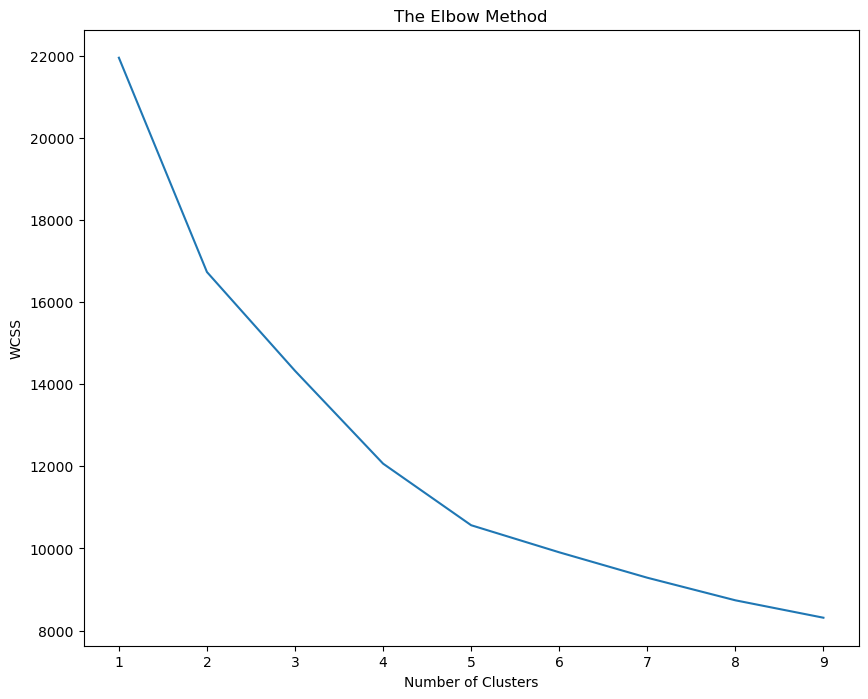

In [250]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 10):
    clf = KMeans(n_clusters=i,random_state=1)
    clf.fit(data)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 10), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show() 

In [251]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

[0.22106864653368805, 0.21661292049475436, 0.25115531531369584, 0.25967728788407546, 0.2321500974728182, 0.23004720761838823, 0.22640264914698502, 0.2348385041688114]


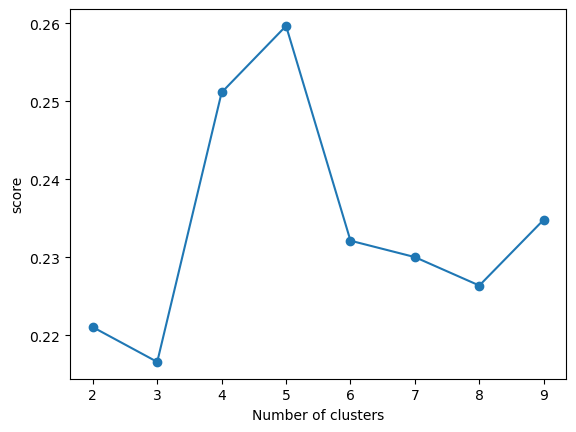

In [252]:
sil = []
sil2=[]
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    label=kmeans.fit_predict(data) 
    sil.append(metrics.silhouette_score(data,label))
    sil2.append([i, metrics.silhouette_score(data,label), davies_bouldin_score(data, label),
                 calinski_harabasz_score(data,label)])

print(sil)    

plt.scatter(range(2, 10), sil)
plt.plot(range(2, 10), sil)
plt.xticks(range(2, 10))

plt.xlabel('Number of clusters')
plt.ylabel('score')
plt.show()

In [253]:
pd.DataFrame(sil2,
             columns=["K", "Silhouette_Score", "davies_bouldin_score", "calinski_harabasz_score"]).sort_values(["Silhouette_Score"], ascending=False)

,K,Silhouette_Score,davies_bouldin_score,calinski_harabasz_score
3,5,0.259677,1.394191,590.087759
2,4,0.251155,1.358429,598.447869
7,9,0.234839,1.531802,450.418587
4,6,0.232150,1.473082,532.412650
5,7,0.230047,1.517566,497.314443
6,8,0.226403,1.535522,471.147961
0,2,0.221069,1.738405,684.080769
1,3,0.216613,1.598436,583.402765


In [254]:
clf = KMeans(n_clusters=2)
y_kmeans = clf.fit_predict(data)  

In [255]:
y_kmeans 

array([1, 0, 1, ..., 1, 1, 0])

In [256]:
clf.cluster_centers_

array([[-0.7137353 ,  0.50739001, -0.16126487,  0.41007345, -0.71991184,
        -0.5835409 , -0.02904331, -0.04210675,  0.10986523,  0.0096451 ],
       [ 0.92501887, -0.65759019,  0.20900332, -0.53146549,  0.93302381,
         0.75628365,  0.03764086,  0.05457141, -0.1423881 , -0.01250029]])

In [257]:
clf.labels_

array([1, 0, 1, ..., 1, 1, 0])

In [258]:
clf.inertia_

16730.969291201127

In [259]:
km=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
km.value_counts()

0    1239
1     956
dtype: int64

In [260]:
import sklearn
print(sklearn.metrics.silhouette_score(data, y_kmeans))
print(davies_bouldin_score(data, y_kmeans))
print(calinski_harabasz_score(data,y_kmeans))

0.22106864653368805
1.73840539541417
684.0807693320596


Text(0.5, 1.0, 'Clusters using KMeans')

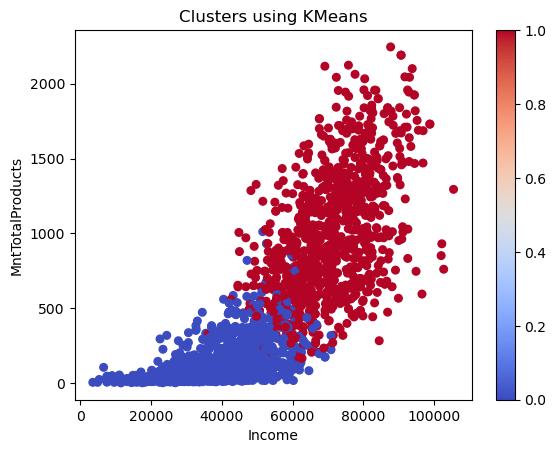

In [261]:
data_final.plot(x="Income",y ="MntTotalProducts",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

In [347]:
clf = KMeans(n_clusters=3)
y_kmeans = clf.fit_predict(data)  


In [348]:
y_kmeans

array([1, 2, 1, ..., 1, 0, 0])

In [349]:
clf.cluster_centers_

array([[-0.26397515,  0.32987065,  0.19955037,  0.43803186, -0.37230669,
        -0.15875245, -1.01053384,  1.27622197, -0.35932607, -0.00129991],
       [ 1.03218475, -0.82160066,  0.13470992, -0.69617456,  1.0579258 ,
         0.74888472,  0.265086  , -0.20000149, -0.11135565, -0.03153632],
       [-0.78817632,  0.53585235, -0.28170446,  0.3328974 , -0.73006914,
        -0.59689377,  0.51808606, -0.78356275,  0.38141784,  0.03123861]])

In [350]:
clf.labels_

array([1, 2, 1, ..., 1, 0, 0])

In [351]:
clf.inertia_

14324.813296666582

In [352]:
km=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
km.value_counts()

2    806
1    773
0    616
dtype: int64

In [353]:

print(sklearn.metrics.silhouette_score(data, y_kmeans))
print(davies_bouldin_score(data, y_kmeans))
print(calinski_harabasz_score(data,y_kmeans))

0.21642055066263197
1.5979351180028265
583.407577730745


Text(0.5, 1.0, 'Clusters using KMeans')

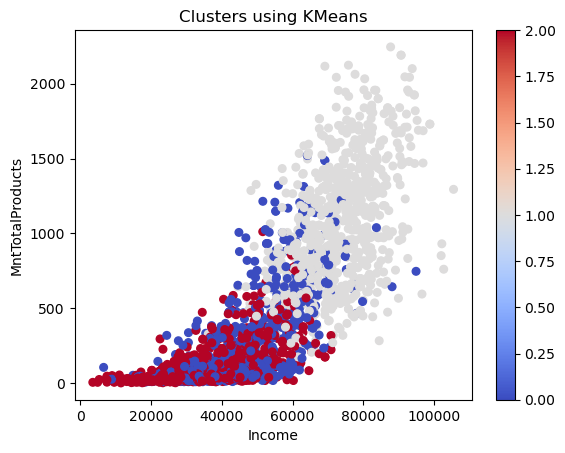

In [354]:
data_final.plot(x="Income",y ="MntTotalProducts",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

In [356]:
import plotly.express as px
fig = px.scatter_3d(data_final, x="Income",y="MntTotalProducts", z="NumTotalPurchases", color=clf.labels_) 
fig.show()

In [271]:
clf = KMeans(n_clusters=4)
y_kmeans = clf.fit_predict(data)  


In [272]:
y_kmeans

array([1, 0, 1, ..., 1, 2, 2])

In [273]:
clf.cluster_centers_

array([[-0.62088821,  0.48113683, -0.15247827,  0.38911364, -0.64738257,
        -0.45557057,  0.98957597, -0.78356275, -0.35932607,  0.00824067],
       [ 1.10502104, -0.90736969,  0.13861963, -0.78162467,  1.1953873 ,
         0.74833077,  0.30041103, -0.10222508, -0.316017  , -0.02320999],
       [-0.26070479,  0.32831649,  0.20352175,  0.43408712, -0.36585527,
        -0.15074286, -1.01053384,  1.27622197, -0.35932607, -0.00782783],
       [-0.56767607,  0.25467073, -0.46554081, -0.09622069, -0.46799986,
        -0.35168019, -1.01053384, -0.78356275,  2.78298759,  0.05946138]])

In [274]:
clf.labels_

array([1, 0, 1, ..., 1, 2, 2])

In [275]:
clf.inertia_

12064.175122318356

In [276]:
km=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
km.value_counts()

0    680
1    654
2    619
3    242
dtype: int64

In [277]:

print(sklearn.metrics.silhouette_score(data, y_kmeans))
print(davies_bouldin_score(data, y_kmeans))
print(calinski_harabasz_score(data,y_kmeans))

0.2509100759302031
1.358519782663124
598.4631838579598


Text(0.5, 1.0, 'Clusters using KMeans')

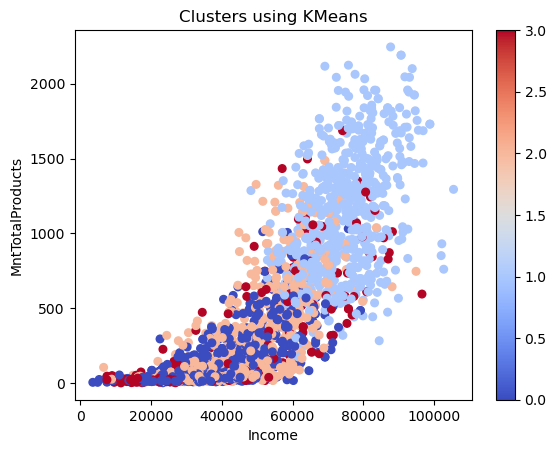

In [278]:
data_final.plot(x="Income",y ="MntTotalProducts",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

In [279]:
import plotly.express as px
fig = px.scatter_3d(data_final, x="Income",y="MntTotalProducts", z="NumWebVisitsMonth", color=clf.labels_) 
fig.show()


In [280]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(data)  


In [281]:
y_kmeans

array([2, 3, 2, ..., 2, 4, 1])

In [282]:
clf.cluster_centers_

array([[-0.53396636,  0.22195922, -0.43792685, -0.11524882, -0.44156028,
        -0.33886871, -1.01053384, -0.78356275,  2.78298759,  0.06205923],
       [-0.48156612,  0.42103059,  0.09748383,  0.5274546 , -0.61587446,
        -0.4285198 , -1.01053384,  1.27622197, -0.35932607,  0.00358371],
       [ 0.94265243, -0.7108721 ,  0.10582783, -0.53854408,  0.8690064 ,
         0.74207756,  0.98957597, -0.78356275, -0.35932607, -0.03001989],
       [-0.7411924 ,  0.55653548, -0.19188502,  0.41432044, -0.72554295,
        -0.58087031,  0.98957597, -0.78356275, -0.35932607,  0.00611059],
       [ 0.97522531, -0.68518559,  0.35099641, -0.59664427,  1.17369009,
         0.77461513, -1.01053384,  1.24704655, -0.31481738, -0.01611081]])

In [283]:
clf.labels_

array([2, 3, 2, ..., 2, 4, 1])

In [284]:
clf.inertia_

10564.130022379992

In [285]:
km=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
km.value_counts()

3    608
2    501
1    487
4    353
0    246
dtype: int64

In [286]:
import sklearn
print(sklearn.metrics.silhouette_score(data, y_kmeans))
print(davies_bouldin_score(data, y_kmeans))
print(calinski_harabasz_score(data,y_kmeans))

0.25967728788407546
1.3941909621027344
590.087759194635


Text(0.5, 1.0, 'Clusters using KMeans')

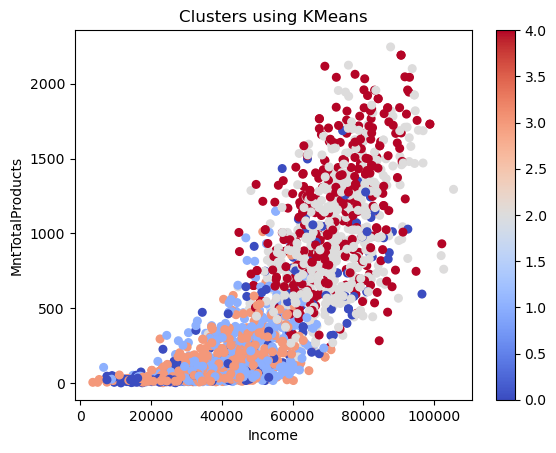

In [287]:
data_final.plot(x="Income",y ="MntTotalProducts",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

In [288]:
import plotly.express as px
fig = px.scatter_3d(data_final, x="Income",y="MntTotalProducts", z="NumWebVisitsMonth", color=clf.labels_) 
fig.show()


In [289]:
clf = KMeans(n_clusters=6)
y_kmeans = clf.fit_predict(data) 

In [290]:
y_kmeans

array([2, 0, 5, ..., 5, 1, 3])

In [291]:
clf.cluster_centers_

array([[-0.91465298,  0.56747175, -0.30903392,  0.35089546, -0.83248704,
        -0.85839285,  0.98957597, -0.78356275, -0.35932607, -0.0096276 ],
       [ 0.96231456, -0.67537904,  0.34799496, -0.58513982,  1.15922814,
         0.77345811, -1.01053384,  1.27622197, -0.35932607, -0.01880812],
       [ 0.35771214,  0.18111092,  0.2588745 ,  0.3420766 ,  0.22591879,
         0.82241677,  0.98957597, -0.78356275, -0.35932607,  0.0059072 ],
       [-0.48163513,  0.42039459,  0.09752284,  0.52839715, -0.61737612,
        -0.43381463, -1.01053384,  1.27622197, -0.35932607,  0.00636522],
       [-0.56070629,  0.24950703, -0.456617  , -0.10103646, -0.46006885,
        -0.34783512, -1.01053384, -0.78356275,  2.78298759,  0.05366842],
       [ 1.2076741 , -1.23764919,  0.0141845 , -1.06268019,  1.13164095,
         0.55222453,  0.9353357 , -0.78356275, -0.27411079, -0.02341613]])

In [292]:
clf.labels_

array([2, 0, 5, ..., 5, 1, 3])

In [293]:
clf.inertia_

9904.742533056244

In [294]:
km=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
km.value_counts()

3    486
0    484
1    349
2    338
5    295
4    243
dtype: int64

In [295]:
import sklearn
print(sklearn.metrics.silhouette_score(data, y_kmeans))
print(davies_bouldin_score(data, y_kmeans))
print(calinski_harabasz_score(data,y_kmeans))

0.2323383778094174
1.4732598687724077
532.4130033091133


Text(0.5, 1.0, 'Clusters using KMeans')

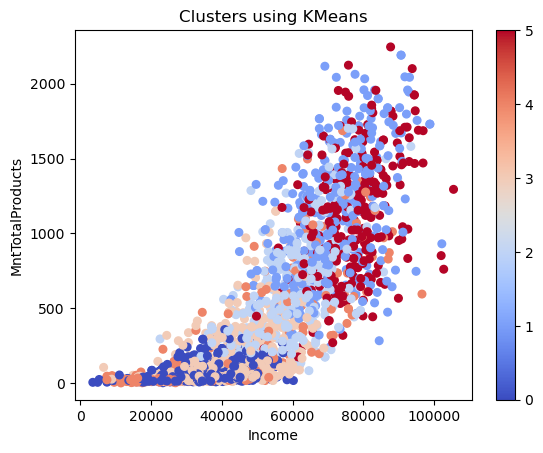

In [296]:
data_final.plot(x="Income",y ="MntTotalProducts",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

In [60]:

#data_clean['Kclust']=km # creating a  new column and assigning it to new column 
#data_clean 

In [61]:
#data_clean.groupby('Kclust')['Kclust'].value_counts()

In [62]:
#data_clean.groupby('Kclust')['Education'].value_counts()

In [63]:
#data_clean.groupby('Kclust')['Children','Kclust'].value_counts()

In [64]:
#data_clean.groupby('Kclust')['Income_Grp','Kclust'].value_counts()

We can observe clusters formed based on Income group high and low. Cluster '0' is having majority Low income group customers and Cluster '1' is having majority High income group customers.

In [65]:
#data_clean.groupby('Marital_Status')['Kclust'].value_counts()

In [66]:
#plt.style.use(['classic']) 
#print(plt.style.available)  

In [67]:
#data_clean.plot(x="Income",y ="MntTotalProducts",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
#plt.title('Clusters using KMeans')   

# DBScan

In [297]:
array = data_final.values
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array) 
X   

array([[ 0.31102694,  0.73012829,  1.01897823, ..., -0.78356275,
        -0.35932607, -1.34822662],
       [-0.26379389, -0.13498998,  1.27546581, ..., -0.78356275,
        -0.35932607, -1.34822662],
       [ 0.96777703, -0.56754911,  0.33501134, ..., -0.78356275,
        -0.35932607,  0.74171507],
       ...,
       [ 0.2546366 ,  0.29756915, -1.03292243, ..., -0.78356275,
        -0.35932607, -1.34822662],
       [ 0.85236448, -1.00010825,  1.10447409, ...,  1.27622197,
        -0.35932607,  0.74171507],
       [ 0.05422425,  0.73012829,  1.27546581, ...,  1.27622197,
        -0.35932607,  0.74171507]])

In [298]:
from sklearn.neighbors import NearestNeighbors  

In [299]:
neigh = NearestNeighbors(n_neighbors=46)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)  

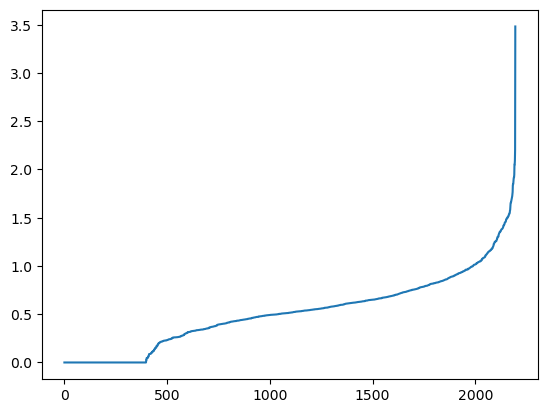

In [300]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)  

In [301]:
'''eps=range(1,10,1)
min_samples=range(1,30)
dav=[]
cal=[]
for i in eps:
    for j in min_samples:
        dbscan = DBSCAN(eps=i, min_samples=j)
        label=dbscan.fit_predict(X)
        if(len(set(label))>1):
            sil.append( [i, j, metrics.silhouette_score(X,label)])
            dav.append( [i, j, metrics.davies_bouldin_score(X,label)])
            cal.append( [i, j, metrics.calinski_harabasz_score(X,label)])'''



'eps=range(1,10,1)\nmin_samples=range(1,30)\ndav=[]\ncal=[]\nfor i in eps:\n    for j in min_samples:\n        dbscan = DBSCAN(eps=i, min_samples=j)\n        label=dbscan.fit_predict(X)\n        if(len(set(label))>1):\n            sil.append( [i, j, metrics.silhouette_score(X,label)])\n            dav.append( [i, j, metrics.davies_bouldin_score(X,label)])\n            cal.append( [i, j, metrics.calinski_harabasz_score(X,label)])'

In [302]:
import numpy as np
eps=range(1,10,1)
min_samples=range(1,20)
silh = []

for i in eps:
    for j in min_samples:
        dbscan = DBSCAN(eps=i, min_samples=j)
        label=dbscan.fit_predict(X)
        if(len(set(label))>1):
            silh.append( [i, j, metrics.silhouette_score(X,label), metrics.davies_bouldin_score(X,label),
                         metrics.calinski_harabasz_score(X,label)])



In [303]:
pd.DataFrame(silh, columns=["EPS", "n", "Sil_Score", "davies_bouldin_score", "calinski_harabasz_score"]).sort_values(["Sil_Score"], ascending=False)

,EPS,n,Sil_Score,davies_bouldin_score,calinski_harabasz_score
56,3,19,0.239275,1.150776,167.291552
47,3,10,0.239275,1.150776,167.291552
38,3,1,0.239275,1.150776,167.291552
39,3,2,0.239275,1.150776,167.291552
41,3,4,0.239275,1.150776,167.291552
42,3,5,0.239275,1.150776,167.291552
43,3,6,0.239275,1.150776,167.291552
44,3,7,0.239275,1.150776,167.291552
45,3,8,0.239275,1.150776,167.291552
46,3,9,0.239275,1.150776,167.291552


In [510]:
#pd.DataFrame(sil, columns=["EPS", "n", "Sil_Score"]).sort_values(["Sil_Score"], ascending=False)

In [511]:
#pd.DataFrame(dav, columns=["EPS", "n",  "davies_bouldin_score"]).sort_values(["davies_bouldin_score"], ascending=True)

In [512]:
#pd.DataFrame(cal, columns=["EPS", "n", "calinski_harabasz_score"]).sort_values(["calinski_harabasz_score"], ascending=False)

In [330]:
dbscan = DBSCAN(eps=3, min_samples=12) #4, 23
dbscan.fit_predict(X)  

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [331]:
dbscan.labels_  

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [332]:
cl=pd.DataFrame(dbscan.labels_ ,columns=['cluster'])   

In [333]:
cl.value_counts() 

cluster
 0         1943
 1          251
-1            1
dtype: int64

In [334]:
sklearn.metrics.silhouette_score(X, dbscan.labels_ )

0.239275215763385

In [335]:
import sklearn
print(sklearn.metrics.silhouette_score(X, dbscan.labels_   ))
print(metrics.davies_bouldin_score(X, dbscan.labels_  ))
print(metrics.calinski_harabasz_score(X, dbscan.labels_  ))

0.239275215763385
1.1507755183157347
167.2915523109732


In [336]:
#ds=pd.Series(dbscan.labels_)  # converting numpy array into pandas series object 
#data_clean['Dclust']=ds # creating a  new column and assigning it to new column 
#data_clean 

In [337]:
#data_clean.groupby('Dclust')['Dclust'].value_counts()

In [338]:
#sklearn.metrics.silhouette_score(data, dbscan.labels_)

Text(0.5, 1.0, 'Clusters using DBScan')

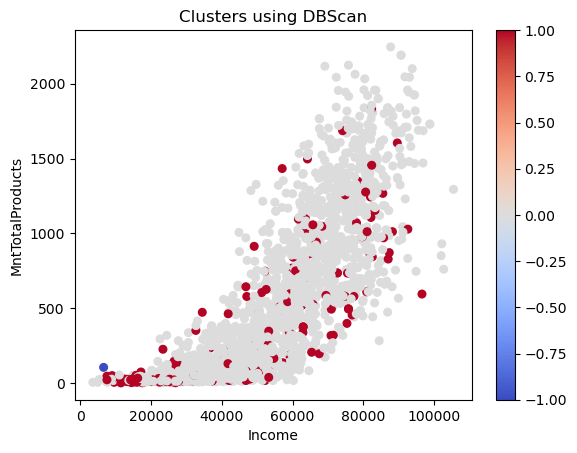

In [339]:
data_final.plot(x="Income",y ="MntTotalProducts",c=dbscan.labels_  ,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using DBScan')

# Hierarchical Clustering

In [328]:
#data=data_final.copy()

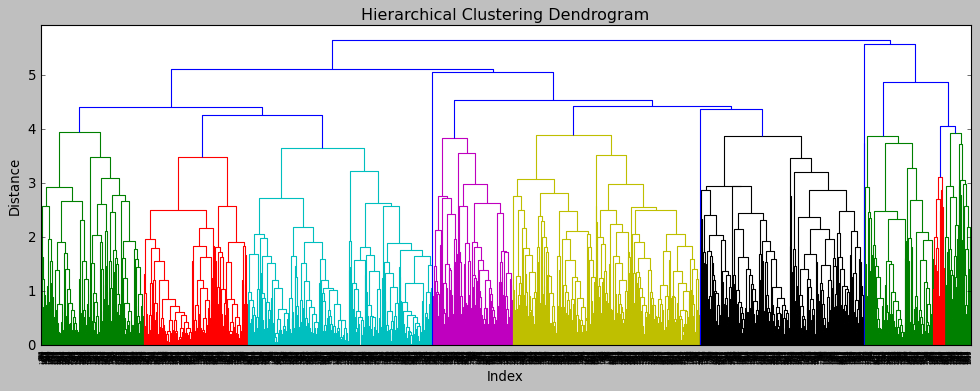

In [331]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z = linkage(data, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()  

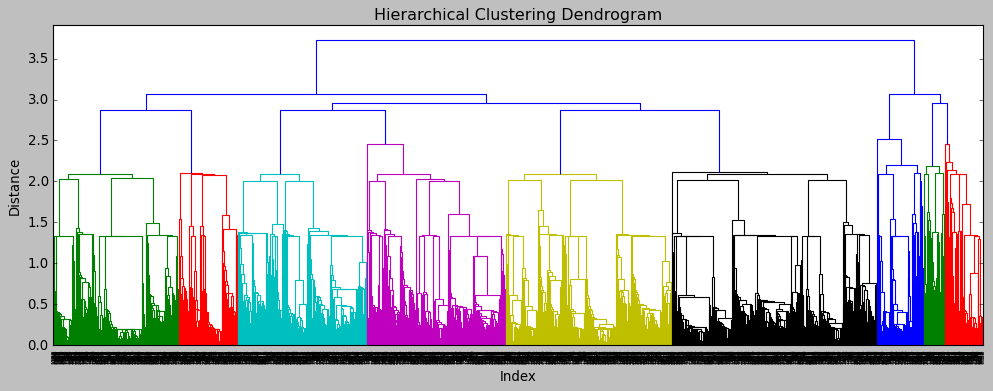

In [332]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z = linkage(data, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show() 

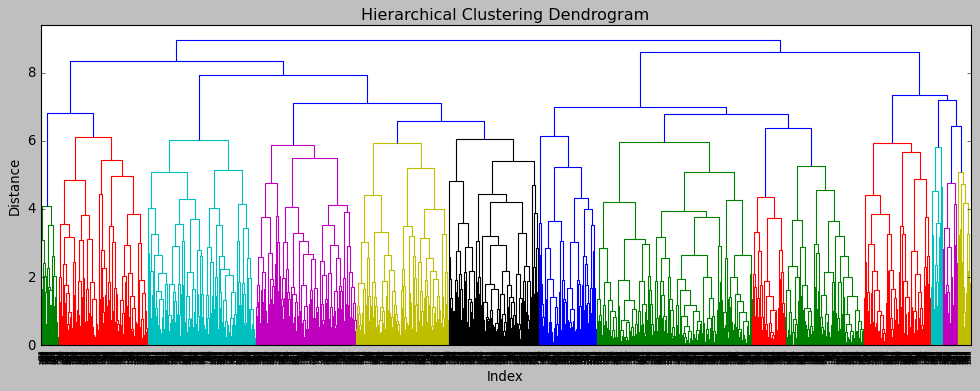

In [333]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z = linkage(data, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()     

In [334]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=3, linkage='complete',affinity = "euclidean").fit(data) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels

0       0
1       2
2       0
3       2
4       0
       ..
2190    0
2191    0
2192    0
2193    0
2194    2
Length: 2195, dtype: int64

In [335]:
cluster_labels.value_counts()

0    1177
2     767
1     251
dtype: int64

In [336]:
import sklearn
print(sklearn.metrics.silhouette_score(data, cluster_labels  ))
print(metrics.davies_bouldin_score(data, cluster_labels  ))
print(metrics.calinski_harabasz_score(data, cluster_labels  ))

0.2032910681375745
1.730897811643575
434.49586882040927


Text(0.5, 1.0, 'Clusters using Hierarchical Clustering')

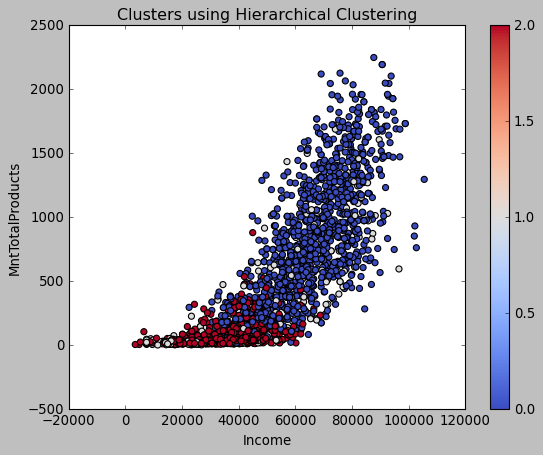

In [337]:
data_clean.plot(x="Income",y ="MntTotalProducts",c=h_complete.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using Hierarchical Clustering') 

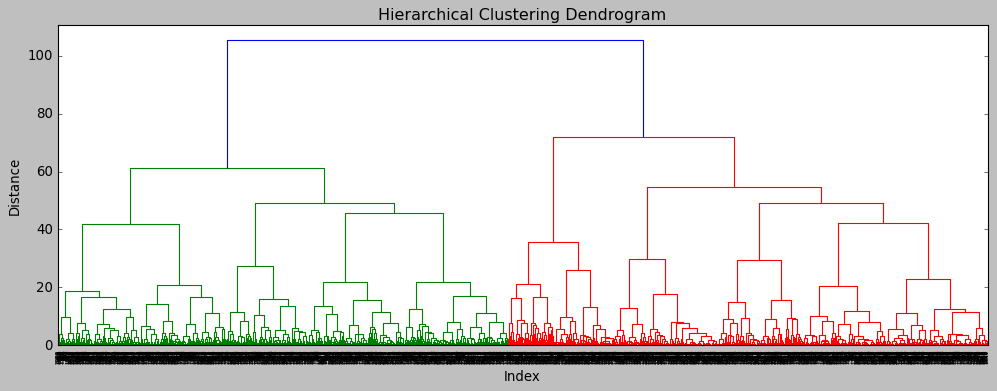

In [338]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z = linkage(data, method="ward",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()     

In [339]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=4, linkage='ward',affinity = "euclidean").fit(data) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels

0       1
1       0
2       1
3       0
4       1
       ..
2190    1
2191    3
2192    1
2193    3
2194    3
Length: 2195, dtype: int64

In [340]:
cluster_labels.value_counts()

0    881
1    663
3    400
2    251
dtype: int64

In [341]:
import sklearn
print(sklearn.metrics.silhouette_score(data, cluster_labels  ))
print(metrics.davies_bouldin_score(data, cluster_labels  ))
print(metrics.calinski_harabasz_score(data, cluster_labels  ))

0.20306560783110875
1.7049426029063737
449.00333001477173


In [342]:
#data_clean['Hclust']=cluster_labels # creating a  new column and assigning it to new column 
#data_clean 

In [343]:
#data_clean.groupby('Hclust')['Income_Grp'].value_counts()

Text(0.5, 1.0, 'Clusters using Hierarchical Clustering')

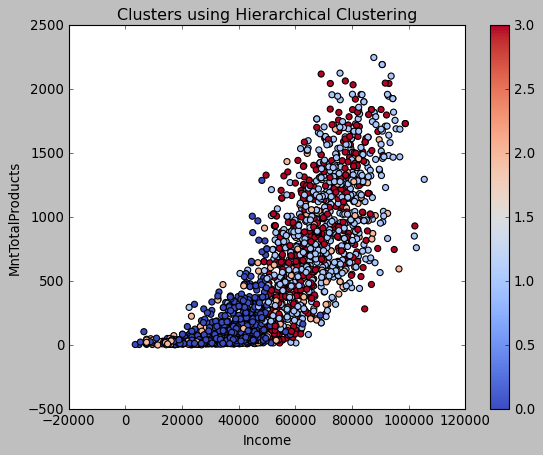

In [344]:
data_clean.plot(x="Income",y ="MntTotalProducts",c=h_complete.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using Hierarchical Clustering') 

# Deleting outliers based on DBScan

In [340]:
ds=pd.Series(dbscan.labels_)  # converting numpy array into pandas series object 
data_final['Dclust']=ds # creating a  new column and assigning it to new column 
data_final

C:\Users\Siva\AppData\Local\Temp\ipykernel_7924\3958159676.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Income,NumWebVisitsMonth,CustomerAge,Children,MntTotalProducts,NumTotalPurchases,Education_Graduation,Education_PostGraduation,Education_UnderGraduation,Marital_Status_Married,Dclust
0,58138.0,7,66,0,1269,21,1,0,0,0,0
1,46344.0,5,69,2,18,4,1,0,0,0,0
2,71613.0,4,58,0,602,11,1,0,0,1,0
3,26646.0,6,39,1,35,4,1,0,0,1,0
4,58293.0,5,42,1,334,13,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2190,61223.0,5,56,1,934,14,1,0,0,1,0
2191,64014.0,7,77,3,436,17,0,1,0,1,0
2192,56981.0,6,42,0,1173,6,1,0,0,0,0
2193,69245.0,3,67,1,672,13,0,1,0,1,0


In [341]:
data_final.groupby('Dclust')['Dclust'].value_counts()

Dclust  Dclust
-1      -1           1
 0       0        1943
 1       1         251
Name: Dclust, dtype: int64

In [342]:
data_cleaned = data_final[data_final.Dclust != -1]

In [343]:
#data_cleaned = data_final[data_final.Dclust != 5]

In [344]:
data_cleaned.shape

(2194, 11)

In [345]:
data_cleaned.to_csv('data_clean.csv')